In [1]:
import warnings
import pandas as pd
from pygav.data import lineplot
# import matplotlib.pyplot as plt

In [3]:
data = []

def parse(file, engine, n_keys, data):
    with open(file, 'r') as f:
        for line in f:
            line = line.strip().split()
            worker, operation, snapshot_id, duration = None, None, None, None
            if len(line) == 21:  # snapshot
                worker, operation, snapshot_id, duration = int(line[5]), 'snapshot', int(line[9]), float(line[20][:-2])
            elif len(line) == 16:  # recovery
                worker, operation, snapshot_id, duration = int(line[5]), 'recovery', int(line[9]), float(line[12][:-2])
            else:
                warnings.warn('unknown type of line')
            data.append({'engine': engine, 'n_keys': n_keys, 'worker': worker, 'operation': operation, 'snapshot_id': snapshot_id, 'duration': duration})


parse('LSM_100K_KEYS__4_WORKERS__1KTPS.txt', 'LSMTree', 100_000, data)
parse('LSM_1M_KEYS__4_WORKERS__1KTPS.txt', 'LSMTree', 1_000_000, data)

parse('HYBRID_100K_KEYS__4_WORKERS__1KTPS.txt', 'HybridLog', 100_000, data)
parse('HYBRID_1M_KEYS__4_WORKERS__1KTPS.txt', 'HybridLog', 1_000_000, data)

parse('APPEND_100K_KEYS__4_WORKERS__1KTPS.txt', 'AppendLog', 100_000, data)
parse('APPEND_1M_KEYS__4_WORKERS__1KTPS.txt', 'AppendLog', 1_000_000, data)

parse('INMEM_100K_KEYS__4_WORKERS__1KTPS.txt', 'MemOnly', 100_000, data)
parse('INMEM_1M_KEYS__4_WORKERS__1KTPS.txt', 'MemOnly', 1_000_000, data)


df = pd.DataFrame.from_dict(data)

In [4]:
recoveries_100k = df[(df['operation'] == 'recovery') & (df['n_keys'] == 100_000)]
recoveries_1m = df[(df['operation'] == 'recovery') & (df['n_keys'] == 1_000_000)]

In [5]:
snapshots_100k = df[(df['operation'] == 'snapshot') & (df['n_keys'] == 100_000)]
snapshots_1m = df[(df['operation'] == 'snapshot') & (df['n_keys'] == 1_000_000)]

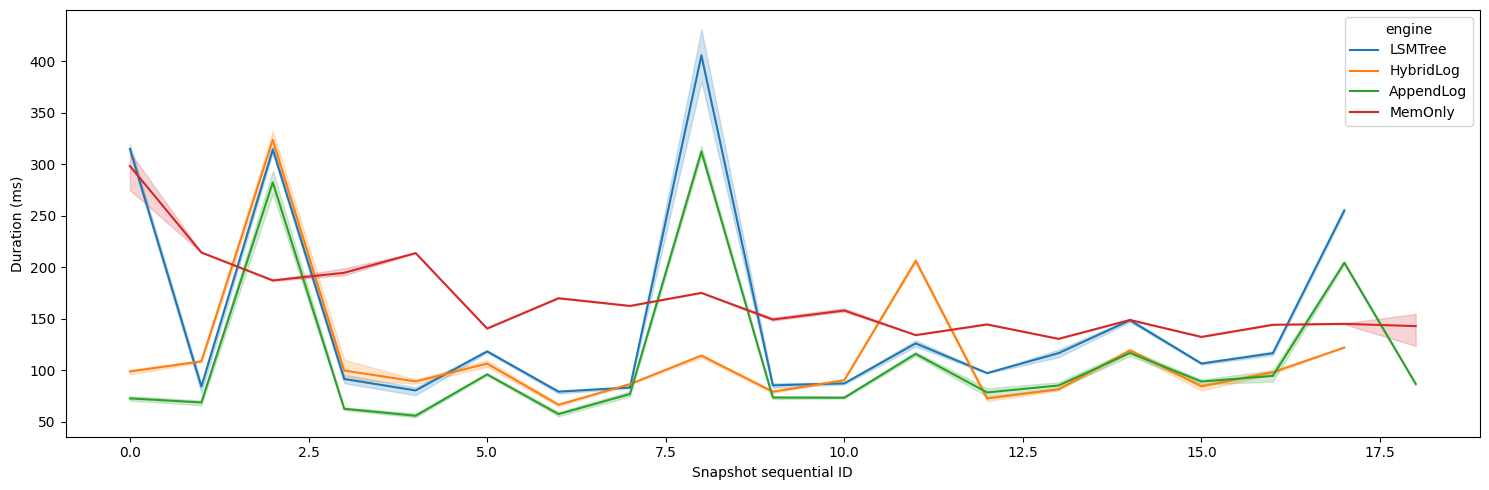

In [10]:
lineplot(data=snapshots_100k, x='snapshot_id', y='duration', hue='engine', figsize=(15, 5), xlabel='Snapshot sequential ID', ylabel='Duration (ms)', filename='../thesis/Figures/snapshot-duration-100k.pdf')
# plt.axvline(3, 0, 1, linestyle=':', color='blue')
# plt.axvline(3.02, 0, 1, linestyle=':', color='orange')
# plt.axvline(3.04, 0, 1, linestyle=':', color='green')
# plt.axvline(3.06, 0, 1, linestyle=':', color='red')

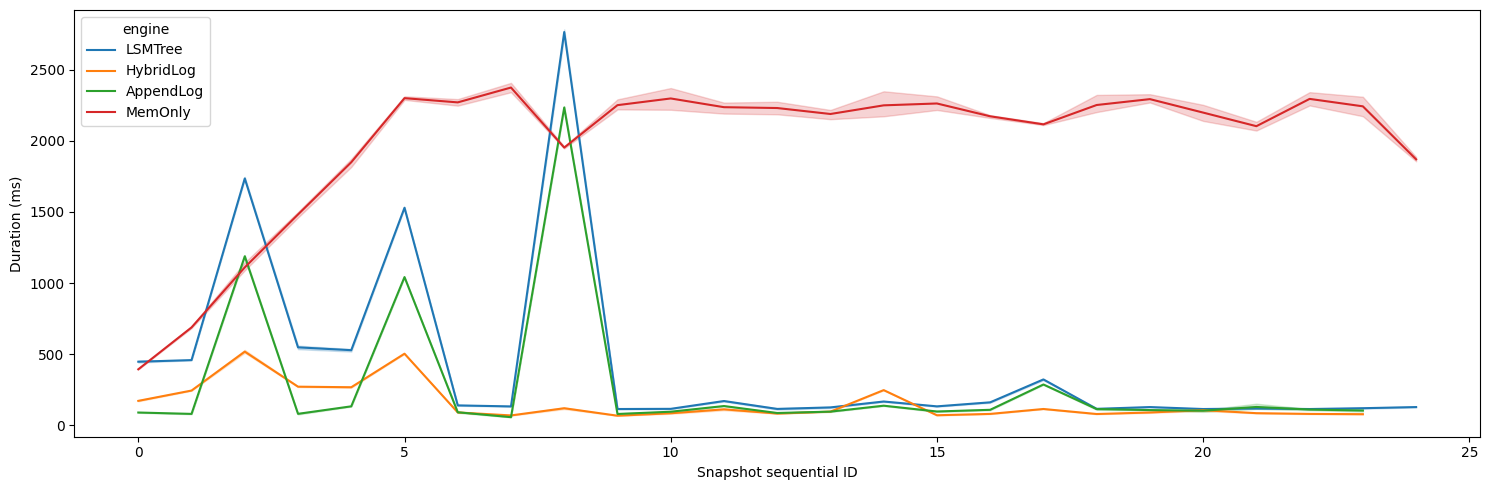

In [11]:
lineplot(data=snapshots_1m, x='snapshot_id', y='duration', hue='engine', figsize=(15, 5), xlabel='Snapshot sequential ID', ylabel='Duration (ms)', filename='../thesis/Figures/snapshot_duration_1m.pdf')
# add vertical lines for the failures/recoveries manually
# plt.axvline(7, 0, 1, linestyle=':', color='blue')
# plt.axvline(5, 0, 1, linestyle=':', color='orange')
# plt.axvline(6, 0, 1, linestyle=':', color='green')
# plt.axvline(7.03, 0, 1, linestyle=':', color='red')

In [13]:
recoveries_100k.groupby(by='engine').mean('duration')

,n_keys,worker,snapshot_id,duration
engine,,,,
AppendLog,100000.0,2.5,3.0,281.139850
HybridLog,100000.0,2.5,3.0,283.951525
LSMTree,100000.0,2.5,3.0,138.899300
MemOnly,100000.0,2.5,3.0,25.611000


In [9]:
recoveries_1m.groupby(by='engine').mean('duration')

,n_keys,worker,snapshot_id,duration
engine,,,,
AppendLog,1000000.0,2.5,6.0,1500.018725
HybridLog,1000000.0,2.5,5.0,1487.707650
LSMTree,1000000.0,2.5,7.0,296.809700
MemOnly,1000000.0,2.5,7.0,100.477250


| Engine    | State Size (num. of keys) | 50p (ms) | 99p (ms) |
|-----------|---------------------------|----------|----------|
| LSMTree   | 1M                        | 5        | 2255     |
| HybridLog | 1M                        | 5        | 2121     |
| AppendLog | 1M                        | 5        | 1883     |
| InMem     | 1M                        | 7        | 57       |